In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

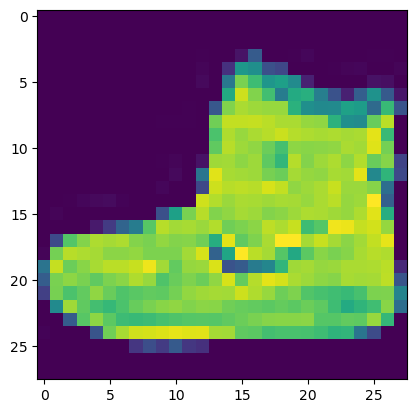

In [3]:
xtrain=xtrain/255
xtest=xtest/255
plt.imshow(xtrain[0])

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10)
])

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
early_stop=tf.keras.callbacks.EarlyStopping()
model.fit(xtrain,ytrain,validation_split=0.1,callbacks=[early_stop],epochs=20)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 770us/step - accuracy: 0.7629 - loss: 0.6706 - val_accuracy: 0.8307 - val_loss: 0.4560
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.8590 - loss: 0.3909 - val_accuracy: 0.8737 - val_loss: 0.3657
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.8736 - loss: 0.3469 - val_accuracy: 0.8775 - val_loss: 0.3390
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.8828 - loss: 0.3186 - val_accuracy: 0.8767 - val_loss: 0.3346
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.8880 - loss: 0.3028 - val_accuracy: 0.8777 - val_loss: 0.3351


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


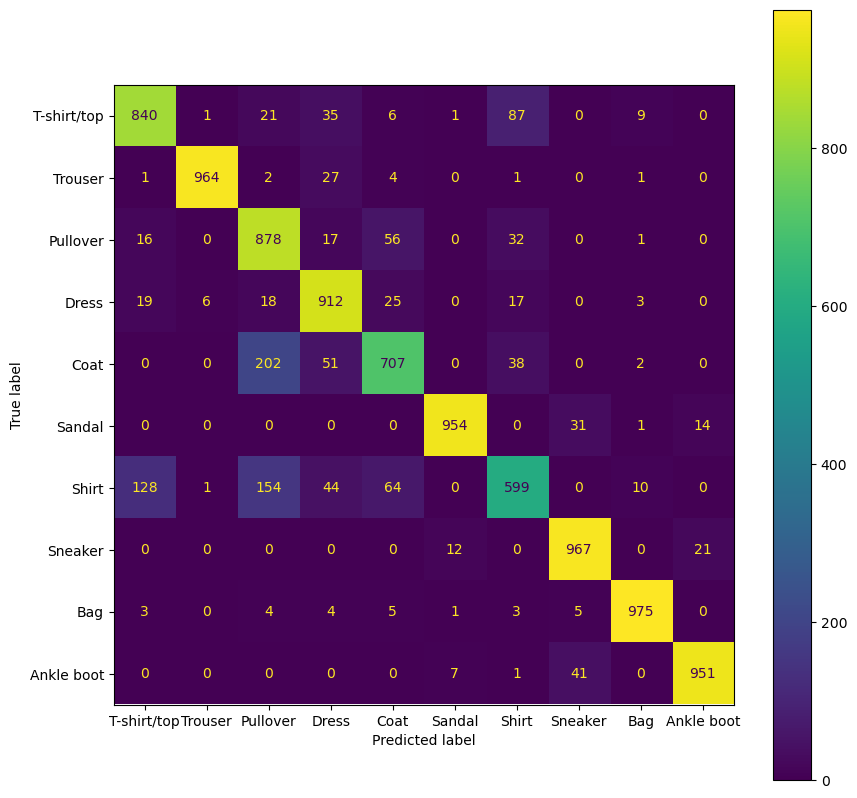

In [10]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
ypred=np.argmax(model.predict(xtest),axis=1)
cm=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(cm,display_labels=classes)
fig,ax=plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)